# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

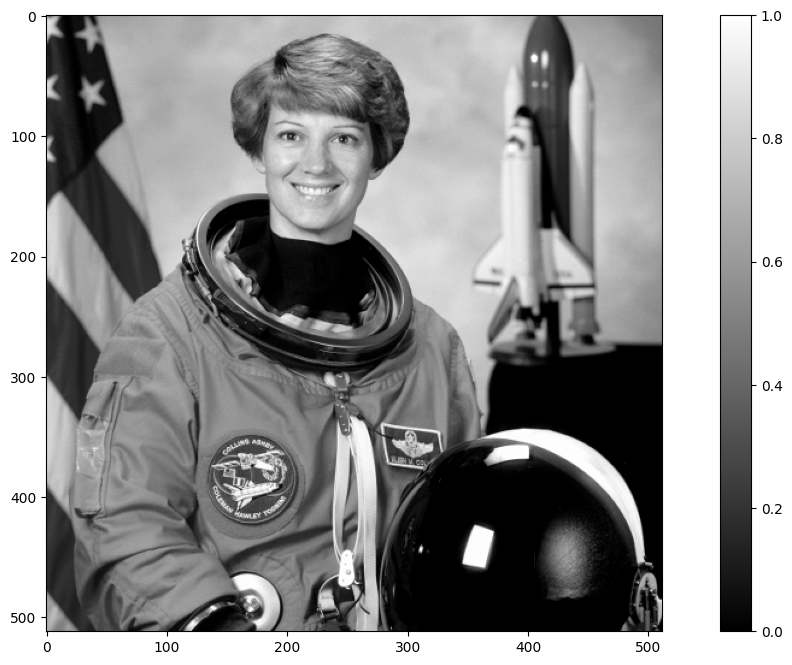

In [2]:
img = plt.imread("data/astronaut.png")
plt.figure(figsize=(15,8))
plt.imshow(img, "gray")
plt.colorbar()

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [28]:

prewitt_h_mask = numpy.array ([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

prewitt_v_mask = numpy.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])


def prewitt_h(img_in):
    result_h = numpy.zeros(img_in.shape)
    size = 3
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0]<n or p[0]>=(img_in.shape[0]-n) or p[1]<n or p[1] >= (img_in.shape[1]-n):
            result_h[p]=0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_sum = neighborhood_sum + img_in[p[0]-n+q[0], p[1]-n+q[1]] * prewitt_h_mask[q[0], q[1]]
        result_h[p]=neighborhood_sum * (1/6)
    return result_h
    
def prewitt_v(img_in):
    result_v = numpy.zeros(img_in.shape)
    size = 3
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0]<n or p[0]>=(img_in.shape[0]-n) or p[1]<n or p[1] >= (img_in.shape[1]-n):
            result_v[p]=0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_sum = neighborhood_sum + img_in[p[0]-n+q[0], p[1]-n+q[1]] * prewitt_v_mask[q[0], q[1]]
        result_v[p]=neighborhood_sum * (1/6)
    return result_v

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

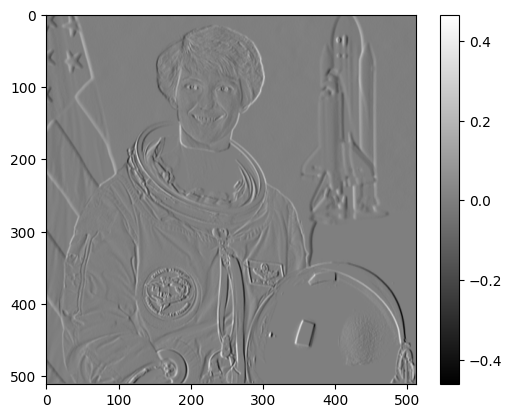

In [29]:
img3 = prewitt_h(img)
plt.imshow(img3, "gray")
plt.colorbar()

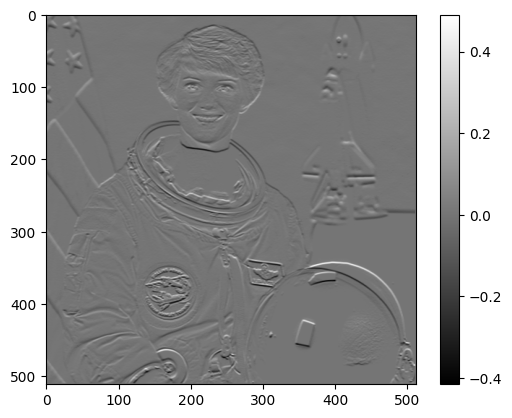

In [32]:
img4 = prewitt_v(img)
plt.imshow(img4, "gray")
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [21]:
import skimage.io
img2_prewitt_h = skimage.io.imread("data/astronaut_prewitt_h.tiff")

import skimage.io
img2_prewitt_v = skimage.io.imread("data/astronaut_prewitt_v.tiff")



In [33]:
assert numpy.allclose(img2_prewitt_h, img3)

assert numpy.allclose(img2_prewitt_v, img4)

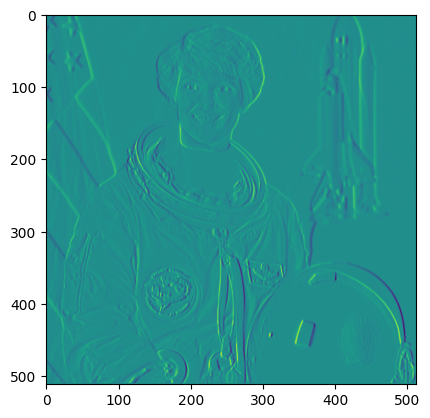

In [27]:
plt.imshow(img2_prewitt_h)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

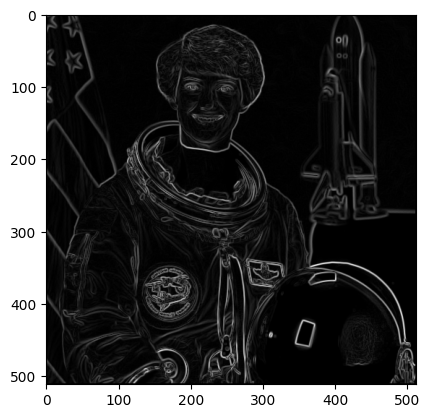

In [44]:
img_magnitude = numpy.sqrt(img3*img3 +img4**2)
plt.imshow(img_magnitude, "gray")

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

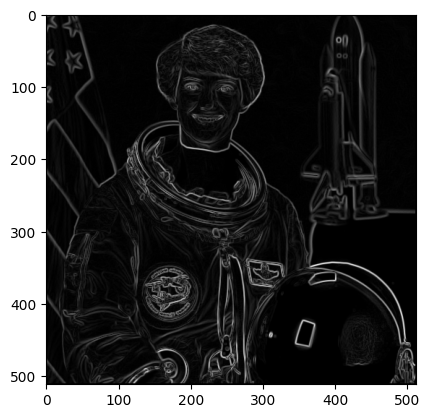

In [39]:
import skimage.io
img_prewitt_gradmag = skimage.io.imread("data/astronaut_prewitt_gradmag.tiff")
plt.imshow(img_prewitt_gradmag, "gray")

In [45]:
assert numpy.allclose(img_prewitt_gradmag, img_magnitude)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`: